# **SMS spam detection**

Spam detection uses various techniques to identify and filter out unwanted messages. These techniques include rule-based filtering, Bayesian filtering, machine learning algorithms, content analysis, and reputation/blacklist checks. These methods analyze message content, patterns, and characteristics to determine if a message is spam or not. By employing these techniques, spam detection systems aim to prevent unsolicited and undesirable messages from reaching users.

### **Steps involve in SMS spam detection:**
0. Importing libraries and loading dataset

1. EDA

2. Text/Data preprocessing

3. Model building

4. Exporting model


### *0. Import libraries and load the dataset*


In [1]:
#import libraries for data cleaning, EDA and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


import sklearn as sk

print(sk.__version__)


#load data
df= pd.read_csv('spam.csv', encoding='latin-1')
df.head(5)



1.3.0


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### *1. EDA*
- EDA:
  Exploratory Data Analysis (EDA) revolves around examining and understanding the structure, patterns, and characteristics of a dataset. EDA is often the first step of the data analysis process. It is used to summarize the main characteristics of a dataset, often with visual methods. EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.

- Steps in EDA:
  - Data collection
  - Data cleaning
  - Data preprocessing
  - Data visualization
  - Statistical analysis
  - Feature selection and engineering
  



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
#drop unnecessary columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#rename columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#label encoding
le= LabelEncoder()
df['target']=le.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#checking for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [7]:
#check for duplicates values
df.duplicated().sum()

403

In [8]:
#removing duplicates
df.drop_duplicates(keep='first',inplace=True) 
df.duplicated().sum()

0

In [9]:
df.shape

(5169, 2)

<Axes: ylabel='target'>

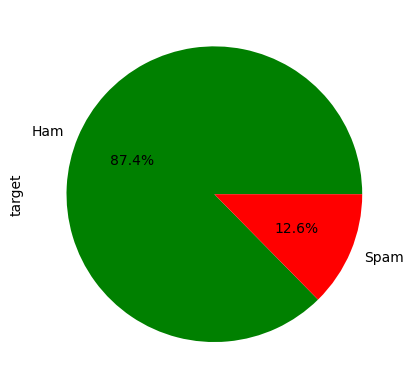

In [10]:
#checking for class imbalance
df['target'].value_counts().plot(kind='pie', autopct='%0.1f%%', labels=['Ham', 'Spam'], colors=['green', 'red'])

In [11]:
df.columns

Index(['target', 'text'], dtype='object')

In [12]:
#create a new column for length of text
df['length']=df['text'].apply(len)
df.head(5)

,target,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
#create a new column for number of words in text
df['words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(5)

,target,text,length,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
#create a new column for number of sentences in text
df['sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,target,text,length,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
#descriptive statistics 
df.describe()

,target,length,words,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [16]:
# describe for ham massages
df[df['target']==0][['length', 'words', 'sentences']].describe()

,length,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [17]:
# describe for spam massages
df[df['target']==1][['length', 'words', 'sentences']].describe()


,length,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [18]:
#compare the describbe of ham and spam
df.groupby('target')[['length', 'words', 'sentences']].describe()


length                                                           \
         count        mean        std   min    25%    50%    75%    max   
target                                                                    
0       4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
1        653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

         words             ...              sentences                      \
         count       mean  ...   75%    max     count      mean       std   
target                     ...                                              
0       4516.0  17.120903  ...  22.0  220.0    4516.0  1.799601  1.278465   
1        653.0  27.667688  ...  32.0   46.0     653.0  2.967841  1.483201   

                                  
        min  25%  50%  75%   max  
target                            
0       1.0  1.0  1.0  2.0  28.0  
1       1.0  2.0  3.0  4.0   8.0  

[2 rows x 24 columns]

<Axes: xlabel='length', ylabel='Count'>

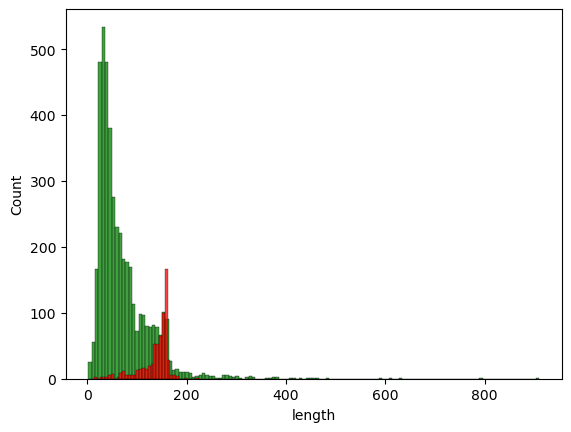

In [19]:
#plotting the histogram for length of text
sns.histplot(df[df['target']==0]['length'], color='green', label='Ham')
sns.histplot(df[df['target']==1]['length'], color='red', label='Spam')


<Axes: xlabel='words', ylabel='Count'>

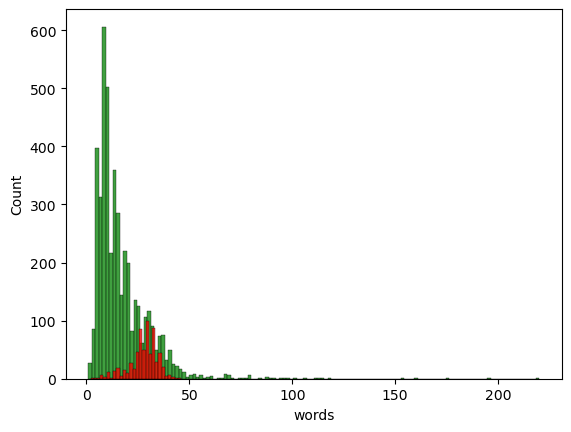

In [20]:
#ploting the histogram for number of words in text
sns.histplot(df[df['target']==0]['words'], color='green', label='Ham')
sns.histplot(df[df['target']==1]['words'], color='red', label='Spam')

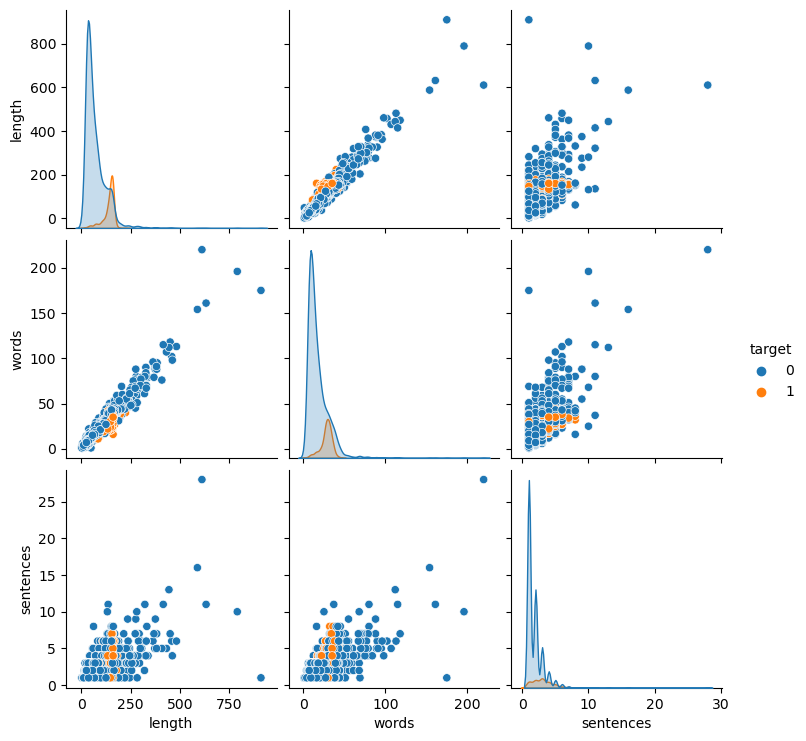

In [21]:
#realtionship between number of columns and length of text
sns.pairplot(df, vars=['length', 'words', 'sentences'], hue='target')

C:\Users\Haseeb\AppData\Local\Temp\ipykernel_11516\4030463011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

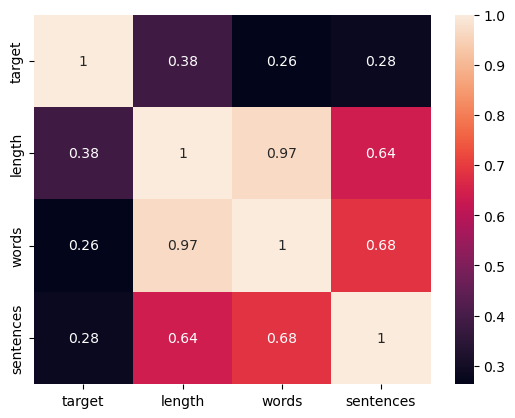

In [22]:
#checking correlation
sns.heatmap(df.corr(), annot=True)


### *2. Data preprocessing*
- Lower case: Converting all text to lowercase, which helps in standardizing the text and reducing the complexity of the analysis.
  
- Tokenization: Breaking down the text into individual tokens (words or phrases) to facilitate further analysis and processing.


- Removing stopwords:  Eliminating commonly used words (such as "a," "the," "is") that do not contribute significant meaning to the text analysis.


- Removing punctuations: Removing punctuation marks from the text to focus on the essential content and avoid noise in the analysis.
  
- stemming/lemmatization: Reducing words to their base or root form (stemming) or converting them to their dictionary form (lemmatization), enabling better analysis by considering different forms of the same word as one entity.

In [61]:
#transforming the text data
def transform_text(text):
    #convert text to lowercase
    text=text.lower()

    #tokenize text 
    text=nltk.word_tokenize(text)

    # remove special characters
    y=[]
    for word in text:
        if word.isalnum():
            y.append(word)

    #cloning the list
    text=y[:]
    y.clear()

    #remove stopwords
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
        
    #again cloning the list    
    text=y[:]
    y.clear()
    
    #stemming
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        

    return " ".join(y)




In [62]:
#transforming the text data and storing in a new column
df['transformed_text']=df['text'].apply(transform_text)

In [27]:
df.head(5)

,target,text,length,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [28]:
#creating the wordcloud for spam massages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

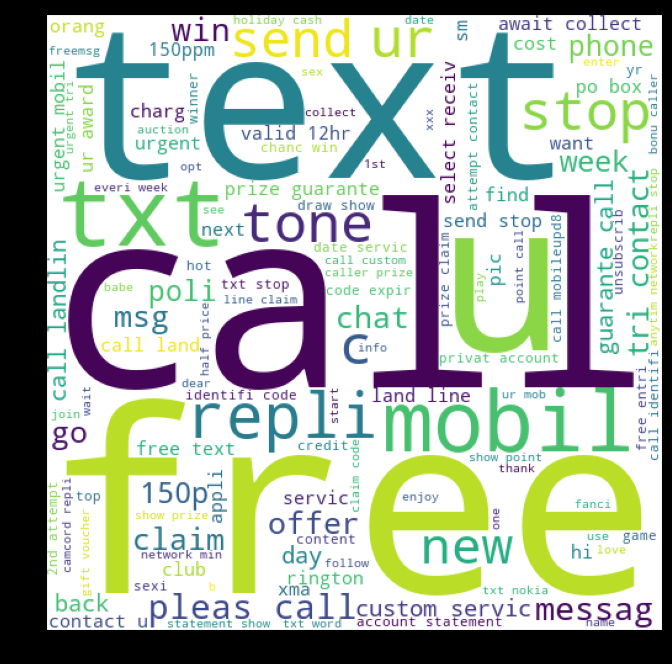

In [29]:
#show the wordcloud
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wc)


In [30]:
#creating the wordcloud for ham massages
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

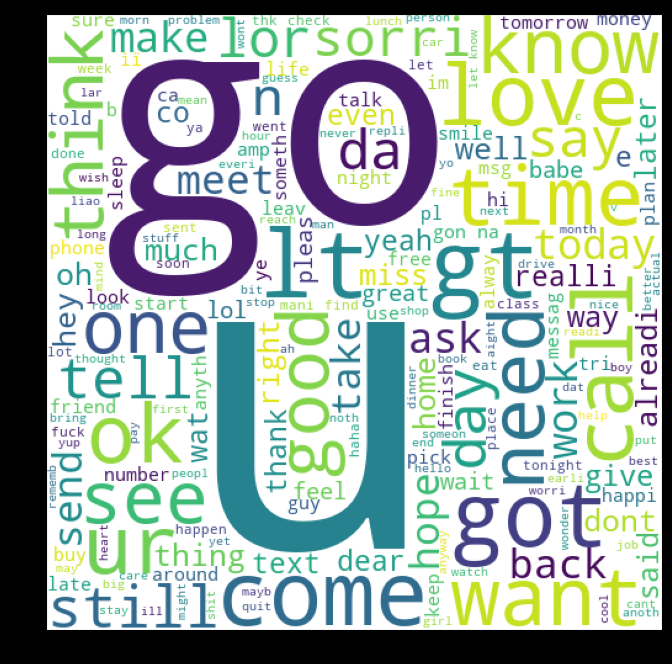

In [31]:
#show the wordcloud
plt.figure(figsize=(10,8), facecolor='k')  
plt.imshow(ham_wc)

In [32]:
#checking the most common words in spam massages
from collections import Counter
spam_words=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

spam_words=pd.DataFrame(Counter(spam_words).most_common(30))
spam_words


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


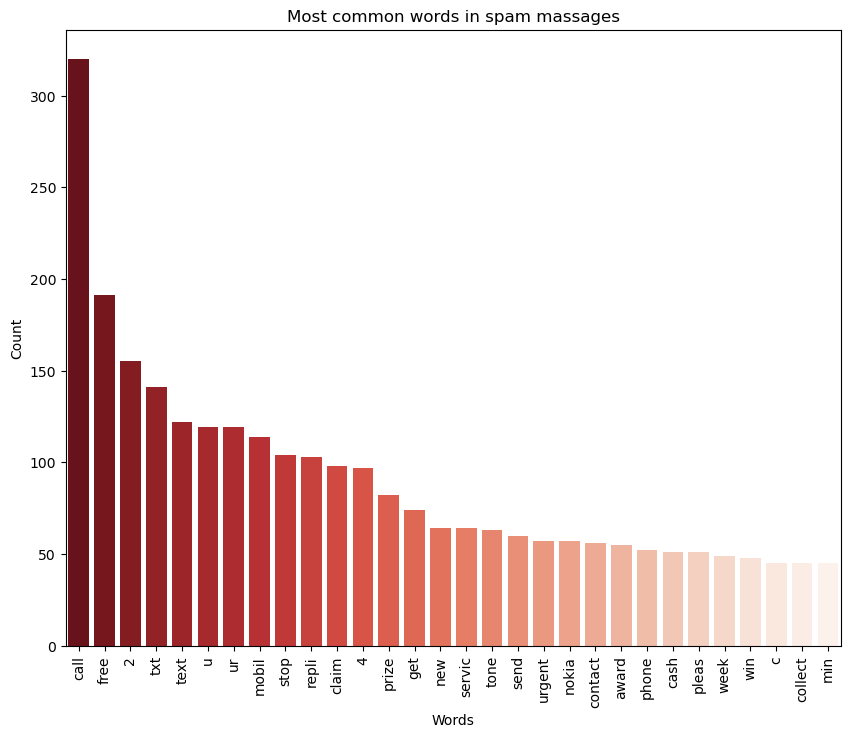

In [33]:
#create a barplot for most common words in spam massages
plt.figure(figsize=(10,8))
sns.barplot(x=spam_words[0], y=spam_words[1], palette='Reds_r')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most common words in spam massages')
plt.show()


In [34]:
#checking the most common words in ham massages
from collections import Counter
ham_words=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_words.append(word)

ham_words=pd.DataFrame(Counter(ham_words).most_common(30))
ham_words

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


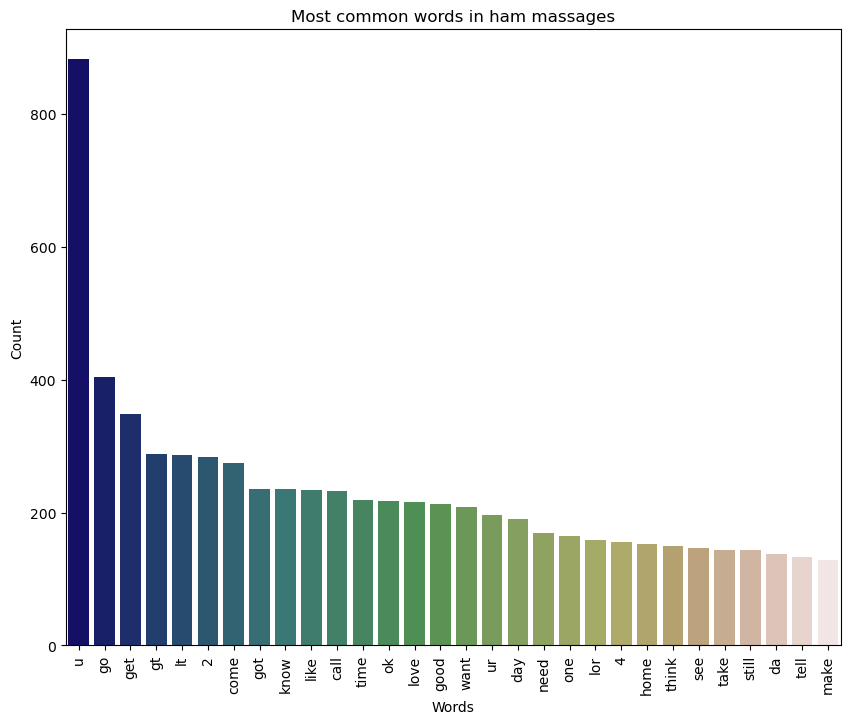

In [35]:
#create a barplot for most common words in spam massages
plt.figure(figsize=(10,8))
sns.barplot(x=ham_words[0], y=ham_words[1], palette='gist_earth')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most common words in ham massages')
plt.show()


### *3. Model building*
- Using TF-IDF:
  Term Frequency-Inverse Document Frequency TF-IDF is a numerical statistic that reflects the importance of a term in a document within a collection of documents. It is calculated by multiplying the term frequency (how often a term appears in a document) by the inverse document frequency (how rare a term is across the entire document collection).

- Building and evaluating the model different models with respect to its accuracy score and precision score:
  - Logistic Regression
  - Naive Bayes
  - Support Vector Machine
  - Random Forest
  - XGBoost
  - SCV 
  - AdaBoost
  - Gradient Boosting
  - BernoulliNB
  - GaussianNB
  - MultinomialNB



In [36]:
#importing libraries for model building and vertorization
from sklearn.feature_extraction.text import  TfidfVectorizer

#libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
#libraries for model evaluation
from sklearn.metrics import accuracy_score,  precision_score 
#library for model train test split
from sklearn.model_selection import train_test_split
#for scaling
from sklearn.preprocessing import MinMaxScaler

In [37]:
#vectorization
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape


(5169, 6708)

In [38]:
y=df['target'].values
y.shape


(5169,)

In [39]:
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
scv= SVC(kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier(n_neighbors=5)
mnb= MultinomialNB(alpha=0.2)
dtc= DecisionTreeClassifier(min_samples_split=7, random_state=2)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
abc= AdaBoostClassifier(n_estimators=50, random_state=2)
gbc= GradientBoostingClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gnb= GaussianNB()
bnb= BernoulliNB()
xgb= XGBClassifier(learning_rate=0.1, n_estimators=50, random_state=2)

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'SVC': scv,
    'KNeighborsClassifier': knc,
    'MultinomialNB': mnb,
    'RandomForestClassifier': rfc,
    'DecisionTreeClassifier': dtc,
    'LogisticRegression': lrc,
    'AdaBoostClassifier': abc,
    'GradientBoostingClassifier': gbc,
    'ExtraTreesClassifier': etc,
    'GaussianNB': gnb,
    'BernoulliNB': bnb,
    'XGBClassifier': xgb
}

# Fit the model and calculate accuracy and precision
def train_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

# Train the model and predict the values
accuracy = []
precision = []

for name, model in models.items():
    result = train_classifier(model, X_train, X_test, y_train.ravel(), y_test)
    accuracy.append(result[0])
    precision.append(result[1])
    print("The accuracy of", name, "is:", result[0])
    print("The precision of", name, "is:", result[1])
    print("=====================================================================")


The accuracy of SVC is: 0.9729206963249516
The precision of SVC is: 0.9465648854961832
The accuracy of KNeighborsClassifier is: 0.8965183752417795
The precision of KNeighborsClassifier is: 1.0
The accuracy of MultinomialNB is: 0.9777562862669246
The precision of MultinomialNB is: 0.9420289855072463
The accuracy of RandomForestClassifier is: 0.9690522243713733
The precision of RandomForestClassifier is: 0.991304347826087
The accuracy of DecisionTreeClassifier is: 0.9477756286266924
The precision of DecisionTreeClassifier is: 0.8053691275167785
The accuracy of LogisticRegression is: 0.9439071566731141
The precision of LogisticRegression is: 0.865546218487395
The accuracy of AdaBoostClassifier is: 0.9477756286266924
The precision of AdaBoostClassifier is: 0.8421052631578947
The accuracy of GradientBoostingClassifier is: 0.9506769825918762
The precision of GradientBoostingClassifier is: 0.9519230769230769
The accuracy of ExtraTreesClassifier is: 0.97678916827853
The precision of ExtraTrees

In [42]:
#saving the model in dataframe
performance=pd.DataFrame({'Model':models.keys(), 'Accuracy':accuracy, 'Precision':precision}).sort_values(by='Precision', ascending=False)
performance

,Model,Accuracy,Precision
1,KNeighborsClassifier,0.896518,1.000000
8,ExtraTreesClassifier,0.976789,0.991870
3,RandomForestClassifier,0.969052,0.991304
10,BernoulliNB,0.966151,0.966102
7,GradientBoostingClassifier,0.950677,0.951923
0,SVC,0.972921,0.946565
2,MultinomialNB,0.977756,0.942029
11,XGBClassifier,0.959381,0.925620
5,LogisticRegression,0.943907,0.865546
6,AdaBoostClassifier,0.947776,0.842105


In [43]:

best_accuracy = max(accuracy)
best_precision = max(precision)

best_accuracy_index = accuracy.index(best_accuracy)
best_precision_index = precision.index(best_precision)

best_accuracy_algorithm = list(models.keys())[best_accuracy_index]
best_precision_algorithm = list(models.keys())[best_precision_index]

print("Best algorithm based on accuracy:", best_accuracy_algorithm)
print("Best algorithm based on precision:", best_precision_algorithm)


Best algorithm based on accuracy: MultinomialNB
Best algorithm based on precision: KNeighborsClassifier


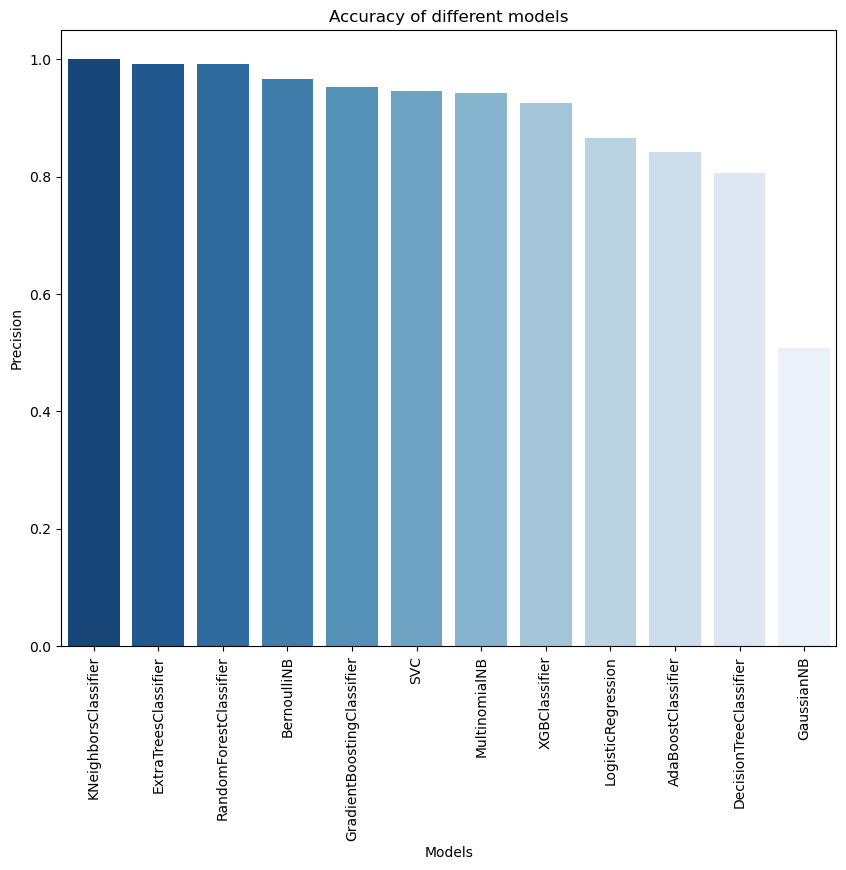

In [44]:
#plotting the accuracy and precision
plt.figure(figsize=(10,8))
sns.barplot(x=performance['Model'], y=performance['Precision'], palette='Blues_r')
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Accuracy of different models')
plt.show()


### *4. Exporting model*

In [60]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(etc, open('model.pkl', 'wb'))

